In [11]:
# https://predictivehacks.com/beginners-guide-predict-the-stock-market/
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import matplotlib.pyplot as plt

In [12]:
# datoer er YYYY-MM-DD
df = yf.download('TSLA', start='2020-01-01', end='2021-05-01', progress=False)
df_close = df[['Close']]
df_close


,Close
Date,
2019-12-31,83.666000
2020-01-02,86.052002
2020-01-03,88.601997
2020-01-06,90.307999
2020-01-07,93.811996
...,...
2021-04-26,738.200012
2021-04-27,704.739990
2021-04-28,694.400024


In [13]:
# We only need the column Close that is the value that we want to predict. Our goal now is to transform the data so we can feed them into our Machine Learning model. We want to have as features the last 10 closing prices. The easiest way to do it is to use the shift function of Pandas.
# Vi går fra 1 kolonne med 252 rækker til 11 kolonner med 242 rækker. 242 pga. dropna. (axis = 1)

df_close_shifted = pd.concat([df_close, df_close.shift(), df_close.shift(2), df_close.shift(3), df_close.shift(4), df_close.shift(5), df_close.shift(6), df_close.shift(7), df_close.shift(8), df_close.shift(9), df_close.shift(10)], axis=1).dropna()

print(df_close_shifted)

                 Close       Close       Close       Close       Close  \
Date                                                                     
2020-01-15  103.699997  107.584000  104.972000   95.629997   96.267998   
2020-01-16  102.697998  103.699997  107.584000  104.972000   95.629997   
2020-01-17  102.099998  102.697998  103.699997  107.584000  104.972000   
2020-01-21  109.440002  102.099998  102.697998  103.699997  107.584000   
2020-01-22  113.912003  109.440002  102.099998  102.697998  103.699997   
...                ...         ...         ...         ...         ...   
2021-04-26  738.200012  729.400024  719.690002  744.119995  718.989990   
2021-04-27  704.739990  738.200012  729.400024  719.690002  744.119995   
2021-04-28  694.400024  704.739990  738.200012  729.400024  719.690002   
2021-04-29  677.000000  694.400024  704.739990  738.200012  729.400024   
2021-04-30  709.440002  677.000000  694.400024  704.739990  738.200012   

                 Close       Close   

In [14]:
df_close_shifted.columns = list(range(0,11))
df_close_shifted.rename(columns={0:'actual_stock_prices'}, inplace=True)
df_close_shifted

,actual_stock_prices,1,2,3,4,5,6,7,8,9,10
Date,,,,,,,,,,,
2020-01-15,103.699997,107.584000,104.972000,95.629997,96.267998,98.428001,93.811996,90.307999,88.601997,86.052002,83.666000
2020-01-16,102.697998,103.699997,107.584000,104.972000,95.629997,96.267998,98.428001,93.811996,90.307999,88.601997,86.052002
2020-01-17,102.099998,102.697998,103.699997,107.584000,104.972000,95.629997,96.267998,98.428001,93.811996,90.307999,88.601997
2020-01-21,109.440002,102.099998,102.697998,103.699997,107.584000,104.972000,95.629997,96.267998,98.428001,93.811996,90.307999
2020-01-22,113.912003,109.440002,102.099998,102.697998,103.699997,107.584000,104.972000,95.629997,96.267998,98.428001,93.811996
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,738.200012,729.400024,719.690002,744.119995,718.989990,714.630005,739.780029,738.849976,732.229980,762.320007,701.979980
2021-04-27,704.739990,738.200012,729.400024,719.690002,744.119995,718.989990,714.630005,739.780029,738.849976,732.229980,762.320007
2021-04-28,694.400024,704.739990,738.200012,729.400024,719.690002,744.119995,718.989990,714.630005,739.780029,738.849976,732.229980


In [15]:
# split data i train og test, vi vil forsøge at forudsige de sidste 10 dage.
train = df_close_shifted.head(len(df_close_shifted) - 10)
test = df_close_shifted.tail(10)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
#lr = Ridge(alpha=2, solver='cholesky')
lr = LinearRegression()

# fit med X værende kolonnerne 1-10, y er kolonne 0
X = train[list(range(1,11))]
y = train['actual_stock_prices']
lr.fit(X,y)
print(lr.score(X,y))
# lad os predicte med test sættets kolonner 1,10, tilføj forudsigelserne som en kolonne til testsættet kaldt 'predictions'
test['predictions'] = lr.predict(test[list(range(1,11))])

#ax=test[['actual_stock_prices', 'predictions']].plot()

0.9931052172009314
C:\Users\Claus\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [37]:
# startDate = test.values[0]
# print(type(startDate))
# predictions = []
# for date in range(0,25):    
#     prediction = lr.predict([startDate[list(range(1,11))]])
#     predictions.append(prediction[0])
#     startDate = np.roll(startDate, 1, 0)
#     startDate[0] = prediction

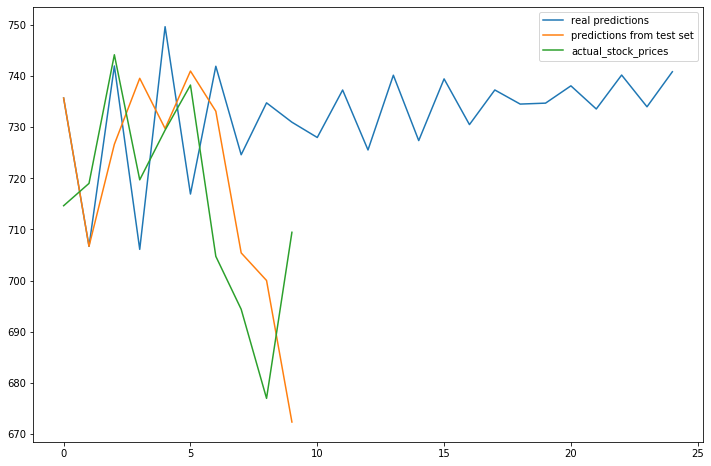

In [38]:
def predictFuture(values:np.ndarray, col_range:list, num_days:int, lr:LinearRegression, roll_function) -> []:
    """
    Makes a prediction for the next [num_days] days based on the [values].
    values - a numpy ndarray containing the initial values, e.g. the last 10 days of stock quotes.
    col_range - a list indicating the column names in values, a prediction should be made from, e.g. 1-11.
    num_days - the number of days of the predicition.
    lr - a sklearn LinearRegression object for making the predictions.
    roll_function - a lambda method to shift each value forward in the values ndarray, as to make room for the predicted value.
    """
    predictions = []    
    for i in range(0, num_days):
        prediction = lr.predict([values[col_range]]);
        predictions.append(prediction[0])
        values = roll_function(values)
        values[0] = prediction
    
    return predictions
    
predictions = predictFuture(test.values[0], list(range(1,11)), 25, lr, lambda x: np.roll(x, 1, 0))

#ax=test[['new_predictions', 'predictions', 'actual_stock_prices']].plot()

plt.figure(figsize=(12,8))
plt.plot(predictions, label="real predictions")
plt.plot(test['predictions'].values, label='predictions from test set')
plt.plot(test['actual_stock_prices'].values, label='actual_stock_prices')
plt.legend()



In [39]:
def predictNextDay(symbol:str, saveModel:bool = False):
    import yfinance as yf
    import pandas as pd
    df = yf.download(symbol, start='2019-01-07', end='2021-01-07', progress=False)[['Close']]
    df = pd.concat([df, df.shift(), df.shift(2), df.shift(3), df.shift(4), df.shift(5), df.shift(6), df.shift(7), df.shift(8), df.shift(9), df.shift(10)], axis=1).dropna()

    df.columns = list(range(0,11))
    df.rename(columns={0:'actual_stock_prices'}, inplace=True)

    train = df.head(len(df)-10)
    test = df.tail(10)

    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    lr.fit(train[list(range(1,11))], train['actual_stock_prices'])

    if saveModel:
        import pickle
        with open(symbol + '_linear_reg_model', 'wb') as file:
            pickle.dump(lr, file)

    test['predictions'] = lr.predict(test.tail(10)[list(range(1,11))])
    ax = test[['actual_stock_prices', 'predictions']].plot()
    return(ax)


C:\Users\Claus\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Claus\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Claus\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

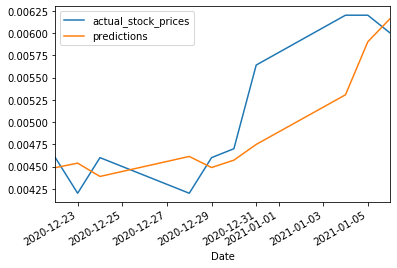

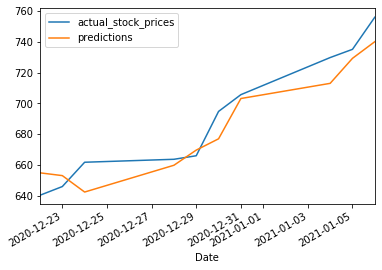

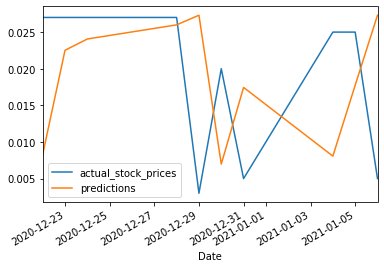

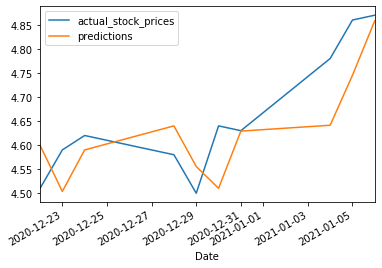

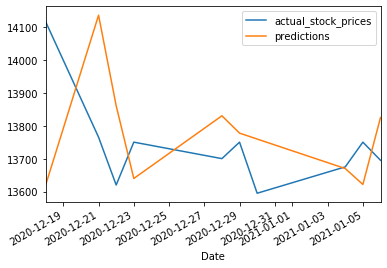

In [40]:
predictNextDay('AMAZ')
predictNextDay('TSLA', True)
predictNextDay('VEST', True)
predictNextDay('GOGL')
predictNextDay('MAERSK-B.CO')